In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    precision_score,
    recall_score,
)
warnings.filterwarnings("ignore")

Text(0, 0.5, 'sigmoid(z)')

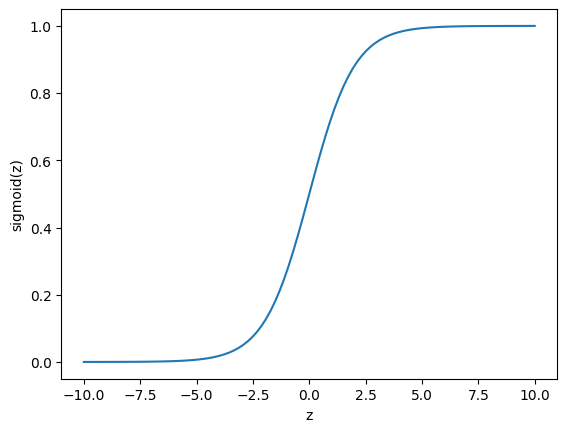

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
X_linesape = np.linspace(-10, 10, 100)
Y_hat = sigmoid(X_linesape)
plt.plot(X_linesape, Y_hat)
plt.xlabel("z")
plt.ylabel("sigmoid(z)")

In [8]:
X_train = np.load("artifacts/X_train.npz")['arr_0']
X_test = np.load("artifacts/X_test.npz")['arr_0']
y_train = np.load("artifacts/y_train.npz")['arr_0']
y_test = np.load("artifacts/y_test.npz")['arr_0']

In [9]:
seed = 42
np.random.seed(seed)


In [12]:
model_lr = LogisticRegression(
    random_state = 42,
    max_iter=1000,

)
# Fit the model
model_lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [13]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

In [16]:
Y_hat_train

array([0, 0, 0, ..., 1, 1, 0], shape=(12712,))

In [14]:
Y_hat_train_proba = model_lr.predict_proba(X_train)[:, 1]
Y_hat_test_proba = model_lr.predict_proba(X_test)[:, 1]

In [15]:
Y_hat_train_proba

array([0.0760221 , 0.3632831 , 0.24034729, ..., 0.72754324, 0.56438085,
       0.41071688], shape=(12712,))